
Author: Kiran Brar


In this notebook, I explore state comparison of the cases and deaths, and testing related to COVID19. For further investigation, I plotted diagonal correlation heatmaps to explore correlations between different variables. Lastly, lag plots and autocorrelation plots are included to analyze if data is stationary (important for time series forecasting).

I used Altair for interactive visualizations!


In [ ]:
#@title

%matplotlib inline
import math
from numpy.random import randn
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy import mean, std
from scipy.stats import  pearsonr
import requests
import pandas as pd
import numpy as np
import altair as alt
from IPython.display import HTML
import matplotlib.pyplot as plt


#https://covidtracking.com/api for details on column names 
states_url = "https://covidtracking.com/api/states/daily"
us_url = "https://covidtracking.com/api/us/daily"

In [ ]:
#@title
req = requests.get(states_url)
states_df = pd.DataFrame(req.json())
states_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200513,AK,383.0,30266.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,338.0,B,5/13/2020 00:00,f0aa4fdcbcf8798aa196f83b3272544e5c3a941d,2020-05-13T20:00:00Z,10.0,NaN,30649,30649,30649,02,0.0,0.0,688.0,0.0,688.0
1,20200513,AL,10617.0,125755.0,NaN,NaN,1317.0,NaN,477.0,NaN,284.0,NaN,B,5/13/2020 00:00,0c929ad796f110118adce3c056060cecf4cde550,2020-05-13T20:00:00Z,449.0,1317.0,136372,136372,136372,01,20.0,30.0,2847.0,307.0,3154.0
2,20200513,AR,4164.0,69051.0,NaN,59.0,497.0,NaN,NaN,12.0,99.0,3220.0,A,5/12/2020 18:33,72af1969cef24d39d08a6be137b8ef56f633511c,2020-05-13T20:00:00Z,95.0,497.0,73215,73215,73215,05,0.0,12.0,2771.0,0.0,2771.0
3,20200513,AS,0.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,5/10/2020 00:00,bcf6d9f15e8b1e7a68106b63798a38260000149f,2020-05-13T20:00:00Z,0.0,NaN,105,105,105,60,0.0,0.0,0.0,0.0,0.0
4,20200513,AZ,12176.0,115574.0,NaN,755.0,1590.0,292.0,NaN,191.0,NaN,2979.0,A+,5/13/2020 00:00,b76df3dfb275ebcb96fcfa48e0f5062f241055d6,2020-05-13T20:00:00Z,594.0,1590.0,127750,127750,127750,04,32.0,26.0,4468.0,440.0,4908.0


In [ ]:
us_req = requests.get(us_url)
us_df = pd.DataFrame(us_req.json())
us_df.sort_values(by=['date'], inplace = True)
us_df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
112,20200122,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6f126ac272c96ac177c9e7a012c1ad72635ef468,2020-01-22T21:00:00Z,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN
111,20200123,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,990a02f183bd45edc0cc64e2e9cee81ade44e1d5,2020-01-23T21:00:00Z,NaN,NaN,1,1,1,0.0,0.0,0.0,0.0,0.0
110,20200124,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,df62af08ca19261e649a2956caaa742afa10fba4,2020-01-24T21:00:00Z,NaN,NaN,1,1,1,0.0,0.0,0.0,0.0,0.0
109,20200125,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3397c4f4ae5bca7147c616b98530b573a34d53fe,2020-01-25T21:00:00Z,NaN,NaN,1,1,1,0.0,0.0,0.0,0.0,0.0
108,20200126,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49d7f7395cd6355c1cfd73e8f987b880a23b0806,2020-01-26T21:00:00Z,NaN,NaN,1,1,1,0.0,0.0,0.0,0.0,0.0


In [ ]:
us_df["date"] = pd.to_datetime(us_df["date"],format='%Y%m%d')
states_df["date"] = pd.to_datetime(states_df["date"],format='%Y%m%d')

# Covid 19 State-Level Data

In [ ]:
#@title
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
states_df["state_name"] = states_df["state"].map(dict(map(reversed, us_state_abbrev.items())))

#California

In [ ]:
ca_data = states_df[states_df["state"] == "CA"]
ca_data.head(5)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,state_name
5,2020-05-13,CA,71141.0,994451.0,NaN,4545.0,NaN,1314.0,NaN,NaN,NaN,NaN,B,5/13/2020 00:00,8a5867cd4322367e6ab3f8a0fb2b92285aa60b64,2020-05-13T20:00:00Z,2934.0,NaN,1065592,1065592,1065592,06,87.0,0.0,30463.0,1759.0,32222.0,California
61,2020-05-12,CA,69382.0,963988.0,NaN,4544.0,NaN,1349.0,NaN,NaN,NaN,NaN,B,5/12/2020 00:00,1c3c812803c41f5b0c75e07b15a8a4428e7d662f,2020-05-12T20:00:00Z,2847.0,NaN,1033370,1033370,1033370,06,77.0,0.0,40030.0,1443.0,41473.0,California
117,2020-05-11,CA,67939.0,923958.0,NaN,4549.0,NaN,1329.0,NaN,NaN,NaN,NaN,B,5/11/2020 00:00,53613cacac307d4a734c079025735a0eec798c35,2020-05-11T20:00:00Z,2770.0,NaN,991897,991897,991897,06,25.0,0.0,34974.0,1259.0,36233.0,California
173,2020-05-10,CA,66680.0,888984.0,NaN,4555.0,NaN,1328.0,NaN,NaN,NaN,NaN,B,5/10/2020 00:00,b618e4b193ed0312e703672e19ebad8c2eb045b9,2020-05-10T20:00:00Z,2745.0,NaN,955664,955664,955664,06,67.0,0.0,40975.0,2119.0,43094.0,California
229,2020-05-09,CA,64561.0,848009.0,NaN,4538.0,NaN,1349.0,NaN,NaN,NaN,NaN,B,5/9/2020 14:00,47564b4be2325468b20b81c3212689a291e88901,2020-05-09T20:00:00Z,2678.0,NaN,912570,912570,912570,06,93.0,0.0,35249.0,2049.0,37298.0,California


In [ ]:
#@title
alt.Chart(ca_data).mark_line(point=True).encode(
    x='date:T',
    y='positive:Q'
).properties(
    title = " Count of Positve Cases  in California",
    width = 500,
     height = 500
)

alt.Chart(...)

In [ ]:
#@title
scales = alt.selection_interval(bind='scales')


alt.Chart(ca_data).mark_line(point=True).encode(
    x='date:T',
    y='death:Q', 
    tooltip = ["death", "date:T"]
).add_selection(
    scales
).properties(
    title = " Number of Deaths in California",
    width = 500,
     height = 500
).interactive()

alt.Chart(...)

In [ ]:
#@title
alt.Chart(ca_data).mark_line(point=True).encode(
    x='date:T',
    y='positiveIncrease:Q',
    tooltip = ["date", "positiveIncrease:Q", "postive:Q"]
).properties(
    title = "Count of New Cases in California",
    width = 500,
     height = 500
).interactive()

#why is it 0 on April 12. No new cases from April 11 to April 12. 

alt.Chart(...)

In [ ]:
#@title

alt.Chart(ca_data).mark_line(point=True).encode(
    x='date:T',
    y='deathIncrease:Q', 
    tooltip = ["date",'deathIncrease:Q']
).properties(
    title = "Count of New Deaths in California"
).interactive()

#why is it 0 on April 12. No new cases from April 11 to April 12. 
#decrease in deaths after April 23

alt.Chart(...)

In [ ]:
#Number of Hospitalized  in California
alt.Chart(ca_data).mark_line(point=True).encode(
    x='date:T',
    y='hospitalizedCurrently:Q',
     tooltip = ["date", "hospitalizedCurrently:Q"]
).properties(
    title = " Count of Hospitalized in California"
).interactive()

alt.Chart(...)

In [ ]:
#@title
alt.Chart(ca_data).mark_line(point=True).encode(
    x='date:T',
    y='total:Q'
).properties(
    title = "Number of Tests"
)

alt.Chart(...)

#State Comparison: Deaths
(Per million) 

In [ ]:
state_population = {
    # Taken from US Census Bureau NST-EST2019-01: Table 1. Annual Estimates of the Resident Population 
    # for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2019
    # https://www.census.gov/newsroom/press-kits/2019/national-state-estimates.html
    "AL": 4903185,
    "AK": 731545,
    "AZ": 7278717,
    "AR": 3017804,
    "CA": 39512223,
    "CO": 5758736,
    "CT": 3565287,
    "DE": 973764,
    "DC": 705749,
    "FL": 21477737,
    "GA": 10617423,
    "HI": 1415872,
    "ID": 1787065,
    "IL": 12671821,
    "IN": 6732219,
    "IA": 3155070,
    "KS": 2913314,
    "KY": 4467673,
    "LA": 4648794,
    "ME": 1344212,
    "MD": 6045680,
    "MA": 6892503,
    "MI": 9986857,
    "MN": 5639632,
    "MS": 2976149,
    "MO": 6137428,
    "MT": 1068778,
    "NE": 1934408,
    "NV": 3080156,
    "NH": 1359711,
    "NJ": 8882190,
    "NM": 2096829,
    "NY": 19453561,
    "NC": 10488084,
    "ND": 762062,
    "OH": 11689100,
    "OK": 3956971,
    "OR": 4217737,
    "PA": 12801989,
    "RI": 1059361,
    "SC": 5148714,
    "SD": 884659,
    "TN": 6829174,
    "TX": 28995881,
    "UT": 3205958,
    "VT": 623989,
    "VA": 8535519,
    "WA": 7614893,
    "WV": 1792147,
    "WI": 5822434,
    "WY": 578759,
    "PR": 3193694,
    "GU": 165_718,
    "VI": 104_914,
    "AS": 55_641,
    "MP": 55_194,
}

states_df["population"] = states_df["state"].map(state_population)
#Mortality rate = (d/p)* 10^n , n is conversion factor (n= 3)
#https://en.wikipedia.org/wiki/Mortality_rate

states_df['deaths_per_thousand'] = (states_df.death /states_df.population)  * 100_000
states_df['cases_per_thousand'] = (states_df.positive /states_df.population)  * 100_000
states_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,state_name,population,deaths_per_thousand,cases_per_thousand
0,2020-05-13,AK,383.0,30266.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,338.0,B,5/13/2020 00:00,f0aa4fdcbcf8798aa196f83b3272544e5c3a941d,2020-05-13T20:00:00Z,10.0,NaN,30649,30649,30649,02,0.0,0.0,688.0,0.0,688.0,Alaska,731545,1.366970,52.354947
1,2020-05-13,AL,10617.0,125755.0,NaN,NaN,1317.0,NaN,477.0,NaN,284.0,NaN,B,5/13/2020 00:00,0c929ad796f110118adce3c056060cecf4cde550,2020-05-13T20:00:00Z,449.0,1317.0,136372,136372,136372,01,20.0,30.0,2847.0,307.0,3154.0,Alabama,4903185,9.157313,216.532723
2,2020-05-13,AR,4164.0,69051.0,NaN,59.0,497.0,NaN,NaN,12.0,99.0,3220.0,A,5/12/2020 18:33,72af1969cef24d39d08a6be137b8ef56f633511c,2020-05-13T20:00:00Z,95.0,497.0,73215,73215,73215,05,0.0,12.0,2771.0,0.0,2771.0,Arkansas,3017804,3.147984,137.981128
3,2020-05-13,AS,0.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,5/10/2020 00:00,bcf6d9f15e8b1e7a68106b63798a38260000149f,2020-05-13T20:00:00Z,0.0,NaN,105,105,105,60,0.0,0.0,0.0,0.0,0.0,American Samoa,55641,0.000000,0.000000
4,2020-05-13,AZ,12176.0,115574.0,NaN,755.0,1590.0,292.0,NaN,191.0,NaN,2979.0,A+,5/13/2020 00:00,b76df3dfb275ebcb96fcfa48e0f5062f241055d6,2020-05-13T20:00:00Z,594.0,1590.0,127750,127750,127750,04,32.0,26.0,4468.0,440.0,4908.0,Arizona,7278717,8.160779,167.282228


Top 10 States with the Most COVID-19 Deaths per million

In [ ]:
most_recent = states_df.head(56)
most_recent.nlargest(10, "death")[['state_name', 'death']]

,state_name,death
37,New York,22013.0
34,New Jersey,9702.0
21,Massachusetts,5315.0
24,Michigan,4714.0
41,Pennsylvania,3943.0
16,Illinois,3792.0
7,Connecticut,3125.0
5,California,2934.0
20,Louisiana,2381.0
10,Florida,1898.0


In [ ]:
most_recent = states_df.head(56)
top_10_states = most_recent.nlargest(10, "deaths_per_thousand")
top_10_states.rename(columns = {'deaths_per_thousand': "Mortality Rate"})[["state_name", "Mortality Rate"]]

,state_name,Mortality Rate
37,New York,113.156661
34,New Jersey,109.229818
7,Connecticut,87.650728
21,Massachusetts,77.112770
20,Louisiana,51.217585
8,District of Columbia,49.592702
24,Michigan,47.202038
43,Rhode Island,43.611196
41,Pennsylvania,30.799901
16,Illinois,29.924665


In [ ]:
top_death_states = top_10_states[['state', 'deaths_per_thousand',"state_name", "death"]]

bars = alt.Chart(top_death_states).mark_bar().encode(
    x = "deaths_per_thousand:Q" ,
    y = alt.Y('state:N', sort = '-x'), 
    tooltip = ['top_death_states:Q', "deaths_per_thousand:Q" ,"death:Q", "state_name"]
).properties(
      title = "Top 10 States with Highest Deaths(per 100 thousand population)",
      width = 500,
     height = 500
).interactive()
bars

alt.Chart(...)

#State Comparison: Cases



In [ ]:
#States with the highest number of COVID19 cases
states_most_cases = most_recent.nlargest(10, "positive")
states_most_cases[['state_name', 'positive']] 

,state_name,positive
37,New York,340661.0
34,New Jersey,141560.0
16,Illinois,84698.0
21,Massachusetts,80497.0
5,California,71141.0
41,Pennsylvania,58698.0
24,Michigan,48391.0
47,Texas,42403.0
10,Florida,42402.0
11,Georgia,35332.0


In [ ]:
#States with the highest cases (per thousand)
top_10_states = most_recent.nlargest(10, "cases_per_thousand")
top_case_states = top_10_states[['state', 'cases_per_thousand',"state_name", "positive"]]
top_case_states[["state_name", "cases_per_thousand"]]

,state_name,cases_per_thousand
37,New York,1751.149828
34,New Jersey,1593.751091
21,Massachusetts,1167.892129
43,Rhode Island,1117.182906
7,Connecticut,977.621156
8,District of Columbia,932.909576
9,Delaware,713.930685
20,Louisiana,702.590822
16,Illinois,668.396436
22,Maryland,575.816120


In [ ]:
bars = alt.Chart(top_case_states).mark_bar().encode(
    x="cases_per_thousand:Q" ,
    y=alt.Y('state:N', sort='-x'), 

    tooltip=['positive',"cases_per_thousand:Q","state"],
).properties(
      title = "Top 10 States with Highest Confirmed Covid 19 Cases",
        width= 500,
        height=500
).interactive()
bars

alt.Chart(...)

In [ ]:
top_10_states["date"] = pd.to_datetime(top_10_states["date"],format='%Y%m%d')

In [ ]:
states_lst = list(top_10_states["state"])
filtered_df = states_df[states_df.state.isin(states_lst)]
filtered_df[["state","date", "positive"]]


alt.Chart(filtered_df).mark_line().encode(
    x='date:T',
    y='positive',
    color='state',
).properties(
    title = " Number of Positive Cases in Top 10 States"
)

alt.Chart(...)

In [ ]:
#static chart
alt.Chart(filtered_df).mark_line().encode(
    x='date:T',
    y='positiveIncrease',
    color='state',
).properties(title = "Number of New COVID 19 Cases")

alt.Chart(...)

In [ ]:
#for top 10 states
source = filtered_df[["state","date", "positiveIncrease"]]

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['date'], empty='none')

# The basic line
line = alt.Chart(source).mark_line( interpolate='basis').encode(
    x='date:T',
    y='positiveIncrease:Q',
    color='state:N'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(source).mark_point(point=True).encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'positiveIncrease:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(source).mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=1000, height=1000, 
    title = " Number of New Positive COVID 19 Cases"
)

alt.LayerChart(...)

In [ ]:
states_df["date"] = pd.to_datetime(states_df["date"], format='%Y%m%d')
states_lst = top_10_states["state"]


source =states_df[states_df.state.isin(states_lst)]

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_circle(size=200).encode(
    x='date:T',
    y='death:Q',
    color=alt.condition(brush, 'state_name:N', alt.value('lightgray')),
    tooltip=[ 'date', 'total', 'death', "state_name"]
).add_selection(
    brush
).properties(
      width= 1000,
      height=500,
      title = "Total Number of COVID-19 Cases for the current most 10 affected states",
)

bars = alt.Chart(source).mark_bar().encode(
    y='state_name:N',
    color='state_name:N',
    x='total:Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

Comparison between deaths and covid 19 cases

In [ ]:
data = pd.concat([top_10_states, top_death_states], axis=1)
data = data[['state', 'cases_per_thousand',"deaths_per_thousand" ]]
data = data.loc[:, ~data.columns.duplicated()]

melted_df = data.melt("state")
melted_df["variable"].replace({"cases_per_thousand": "Cases", "deaths_per_thousand": "Deaths"}, inplace=True)


In [ ]:
alt.Chart(melted_df).mark_bar().encode(
    alt.X('variable:N', axis= alt.Axis(title='',orient = "bottom")),
    alt.Y('value:Q', axis = alt.Axis(title='Number(per thousand)')),
    color= alt.Color('variable:N'),
    column ='state:O'
).configure_view(
    stroke='transparent'
)

alt.Chart(...)

#State Comparison : Baseline States

In [ ]:
 Baseline = ["WA", "NY", "CA"]

In [ ]:
#Raw count numbers

#States with the highest number of COVID-19 cases
most_num_cases = most_recent.nlargest(10, "positive")[['state', 'positive']]
most_num_cases

bars = alt.Chart(most_num_cases).mark_bar().encode(
    x="positive",
    y=alt.Y('state', sort='-x'), 
    tooltip=["positive", "state"],
).properties(
      title = "Top 10 States with Highest Confirmed Covid 19 Cases",
        width= 500,
        height=500
).interactive()
bars

alt.Chart(...)

In [ ]:


categorical_chart = alt.Chart(states_df[states_df.state.isin(states_lst)]).mark_circle(size=200).encode(

                          alt.X('date:T', axis = alt.Axis(title = 'Date'.upper(), format = ("%b %d"))),
                          y='total:Q',
                          color='state:N',
                          size ='total:Q' , 
                          tooltip=['state', 'date', 'total', 'death']).properties(
                              title = "Total Number of COVID-19 Cases for the current most 10 affected states",
                                width= 1000,
                                height=500
).interactive()

categorical_chart

alt.Chart(...)

In [ ]:
import altair as alt
from vega_datasets import data

source =states_df[states_df.state.isin(states_lst)]

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_circle(size=200).encode(
    x='date:T',
    y='total:Q',
    color=alt.condition(brush, 'state:N', alt.value('lightgray')),
    tooltip=['state', 'date', 'total', 'death']
).add_selection(
    brush
).properties(
      width= 1000,
      height=500,
      title = "Total Number of COVID-19 Cases for the current most 10 affected states",
)

bars = alt.Chart(source).mark_bar().encode(
    y='state:N',
    color='state:N',
    x='total:Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

#How effectively are states testing for COVID-19?



Statisitical correlation measures the strength between two variables. To summarize the correlation,we also computed the Pearson coefficient. The correlation coefficient range from -1 to 1, indicating strong negative correlation to strong positve correlation. Value of 0 indicates no correlation. 

Furthermore, we computed P-values to determine if the correlation coefficient is statistically significant. The null hypothesis is stated as "No correlation between the two variables". If the p \< 0.05, we stated that the correlation is statistically significant and can still be due to  chance. However, if p \< 0.01, the correlation coefficient is highly statistcally signifcant and it cannot be attributed to random chance.

Lastly, correlation does not imply causation! 


In order to do a state by state comparison, we transformed the raw number of confirmed cases to number of confirmed cases per (100,000) people.


In [ ]:
#Calculate testing rate per capita

print("States with the most number of cases:")
list(states_most_cases["state_name"])

States with the most number of cases:


['New York',
 'New Jersey',
 'Illinois',
 'Massachusetts',
 'California',
 'Pennsylvania',
 'Michigan',
 'Texas',
 'Florida',
 'Georgia']

In [ ]:
print("States with the most number of cases per capita:")
lst = list(top_10_states["state_name"])
lst

States with the most number of cases per capita:


['New York',
 'New Jersey',
 'Massachusetts',
 'Rhode Island',
 'Connecticut',
 'District of Columbia',
 'Delaware',
 'Louisiana',
 'Illinois',
 'Maryland']

In [ ]:
df1 = pd.read_csv('COVID19_state.csv' )

df1['Tested_per_thous'] = (df1['Tested']/df1['Population'])* 100_000
df1['Infected_per_thous'] = (df1['Infected']/df1['Population']) * 100_000
df1['Deaths_per_thous'] = (df1['Deaths']/df1['Population'])* 100_000
df1['ICU Beds_per_thous'] =  (df1['ICU Beds']/df1['Population'])* 100_000
df1['Respiratory Deaths_per_thous'] =  (df1['Respiratory Deaths']/df1['Population'])* 100_000
df1['Physicians_per_thous'] =  (df1['Physicians']/df1['Population'])* 100_000


df1[df1.State.isin(lst)]

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,Unemployment,Sex Ratio,Smoking Rate,Flu Deaths,Respiratory Deaths,Physicians,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date,Tested_per_thous,Infected_per_thous,Deaths_per_thous,ICU Beds_per_thous,Respiratory Deaths_per_thous,Physicians_per_thous
6,Connecticut,22029,5276,165.0,3563077,735.8689,0.4945,674,74561,76342,3.8,0.947106,12.7,14.8,28.9,15605,32,9859,7.2,1.0,49.00,88.0,0.30,0.38,0.32,03/17/20,618.257759,148.074263,4.630829,18.916234,0.811097,437.964153
7,District of Columbia,6438,902,21.0,720687,11814.5410,0.5420,314,47285,200277,5.2,0.888570,14.3,11.2,19.6,7346,10,11944,9.8,0.0,54.65,100.0,0.30,0.48,0.22,03/16/20,893.314296,125.158356,2.913886,43.569539,2.719627,1019.305191
8,Delaware,4289,593,14.0,982895,504.3073,0.4522,186,51449,77253,3.9,0.926194,17.0,13.1,40.4,3148,7,10254,8.3,0.0,55.30,83.3,0.30,0.37,0.33,03/16/20,436.364006,60.331978,1.424364,18.923690,4.110307,320.278361
14,Illinois,53581,10357,243.0,12659682,228.0243,0.4810,3144,56933,67268,3.4,0.955038,15.5,16.3,36.2,43377,187,8262,9.3,2.0,51.80,88.5,0.33,0.38,0.28,03/17/20,423.241279,81.810902,1.919479,24.834747,0.285947,342.638938
18,Louisiana,58498,12496,409.0,4645184,107.5175,0.4990,1289,45542,53589,5.2,0.931281,23.1,15.6,43.1,13821,158,7815,7.9,1.0,66.40,73.2,0.34,0.37,0.28,03/16/20,1259.325788,269.009796,8.804818,27.749170,0.927843,297.533962
19,Massachusetts,68800,11736,216.0,6976597,894.4355,0.4786,1326,70073,82480,2.8,0.943662,13.7,15.8,30.9,36506,75,10559,6.3,1.0,47.90,92.0,0.30,0.39,0.31,03/17/20,986.154138,168.219549,3.096065,19.006401,0.442909,523.263706
20,Maryland,28337,3609,67.0,6083116,626.6731,0.4499,1134,62914,68573,3.3,0.929378,13.8,13.6,31.0,24676,50,8602,7.7,1.0,54.20,87.2,0.31,0.39,0.29,03/16/20,465.830341,59.328147,1.101409,18.641762,0.509607,405.647369
31,New Jersey,75356,34124,846.0,8936574,1215.1991,0.4813,1822,67609,69378,3.8,0.946698,13.7,12.6,28.0,30502,82,8859,8.1,1.0,52.70,94.7,0.31,0.38,0.30,03/18/20,843.231422,381.846556,9.466715,20.388126,0.313319,341.316482
34,New York,283621,113704,3565.0,19440469,412.5211,0.5229,3952,68667,85746,3.7,0.937557,14.1,18.4,28.5,89500,166,9778,6.6,3.0,45.40,87.9,0.31,0.39,0.30,03/18/20,1458.920564,584.883009,18.338035,20.328728,0.146601,460.379840
39,Rhode Island,4190,452,18.0,1056161,1021.4323,0.4781,279,54523,57852,3.4,0.942819,14.9,13.3,31.2,4988,11,9551,7.3,0.0,50.10,90.7,0.29,0.39,0.32,03/16/20,396.719818,42.796505,1.704286,26.416427,2.954095,472.276481


data1: mean=655.224 stdv=638.914
data2: mean=84.495 stdv=111.784
Pearson Coefficient
(0.6894975646316808, 2.2018792718413426e-08)


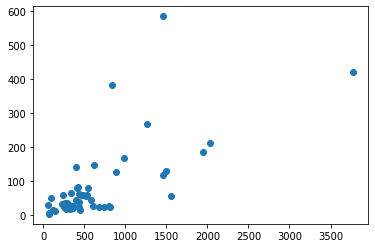

In [ ]:
x = df1['Tested_per_thous']
y = df1['Infected_per_thous']

print('data1: mean=%.3f stdv=%.3f' % (mean(x), std(x)))
print('data2: mean=%.3f stdv=%.3f' % (mean(y), std(y)))

print('Pearson Coefficient')
print(pearsonr(x, y )) # assumes linear relationship

# plot
plt.scatter(x, y)
plt.show()

#We can conclude that this statistically significant 

Pearson Coefficient
(0.5529806714228136, 2.575571104387515e-05)


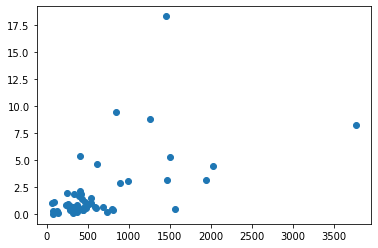

In [ ]:
x = df1['Tested_per_thous']
y = df1['Deaths_per_thous']

print('Pearson Coefficient')
print(pearsonr(x, y )) # assumes linear relationship

# plot
plt.scatter(x, y)
plt.show()

#Postive correlation between tested and  death and its satistically significant 

data1: mean=655.224 stdv=638.914
data2: mean=1.775 stdv=1.919
(0.4857647261190999, 0.0003021158676463182)


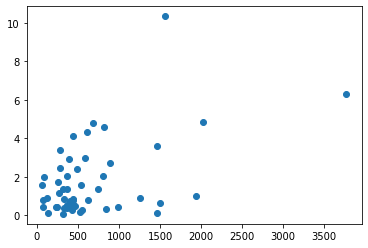

In [ ]:
#Tested and Respiratory deaths
x = df1['Tested_per_thous']
y = df1[ 'Respiratory Deaths_per_thous']

print('data1: mean=%.3f stdv=%.3f' % (mean(x), std(x)))
print('data2: mean=%.3f stdv=%.3f' % (mean(y), std(y)))

print(pearsonr(x, y )) # assumes linear relationship

# plot
plt.scatter(x, y)
plt.show()

#We can conclude that this statistically significant 
#positive 

#Are states responding affectively?

Pearson Coefficient
(-0.10082838525577763, 0.48142977781457547)


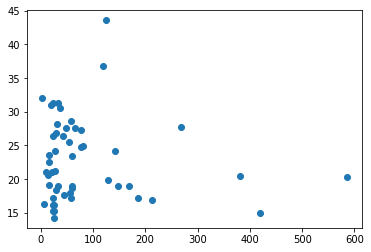

In [ ]:
x = df1['Infected_per_thous']
y = df1['ICU Beds_per_thous']

print('Pearson Coefficient')
print(pearsonr(x, y ))

# plot
plt.scatter(x, y)
plt.show()

#No correlation between Infected and ICU Beds 

Pearson Coefficient
(0.319189374083178, 0.022428161013691512)


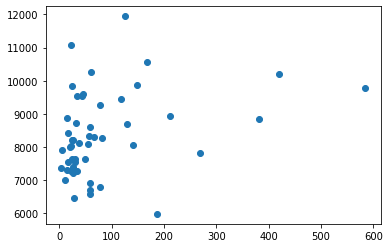

In [ ]:
x = df1['Infected_per_thous']
y = df1['Health Spending']

print('Pearson Coefficient')
print(pearsonr(x, y ))  

# plot
plt.scatter(x, y)
plt.show()

#Positive Correlation between infected and spending. This is statistically signifance(could be due to chance)

Pearson Coefficient
(0.29166690726531974, 0.037831973610154584)


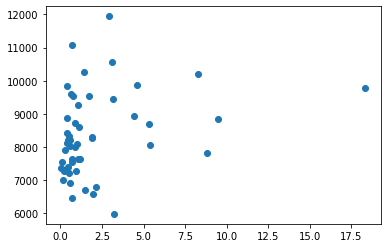

In [ ]:
x = df1['Deaths_per_thous']
y = df1['Health Spending']

print('Pearson Coefficient')
print(pearsonr(x, y )) # assumes linear relationship

# plot
plt.scatter(x, y)
plt.show()

#Positive Correlation between deaths and health spending. This is statistically signifance(could be due to chance)

Pearson Coefficient
(0.29079641191199757, 0.038434589171752624)


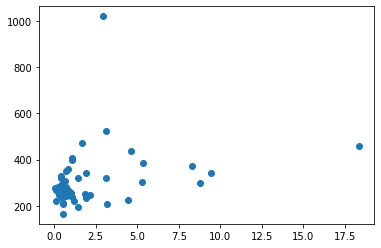

In [ ]:
x = df1['Deaths_per_thous']
y = df1['Physicians_per_thous']

print('Pearson Coefficient')
print(pearsonr(x, y )) # assumes linear relationship

# plot
plt.scatter(x, y)
plt.show()

#Positive Correlation between number of deaths and number of physicians

#Diagonal Correlation Heatmap

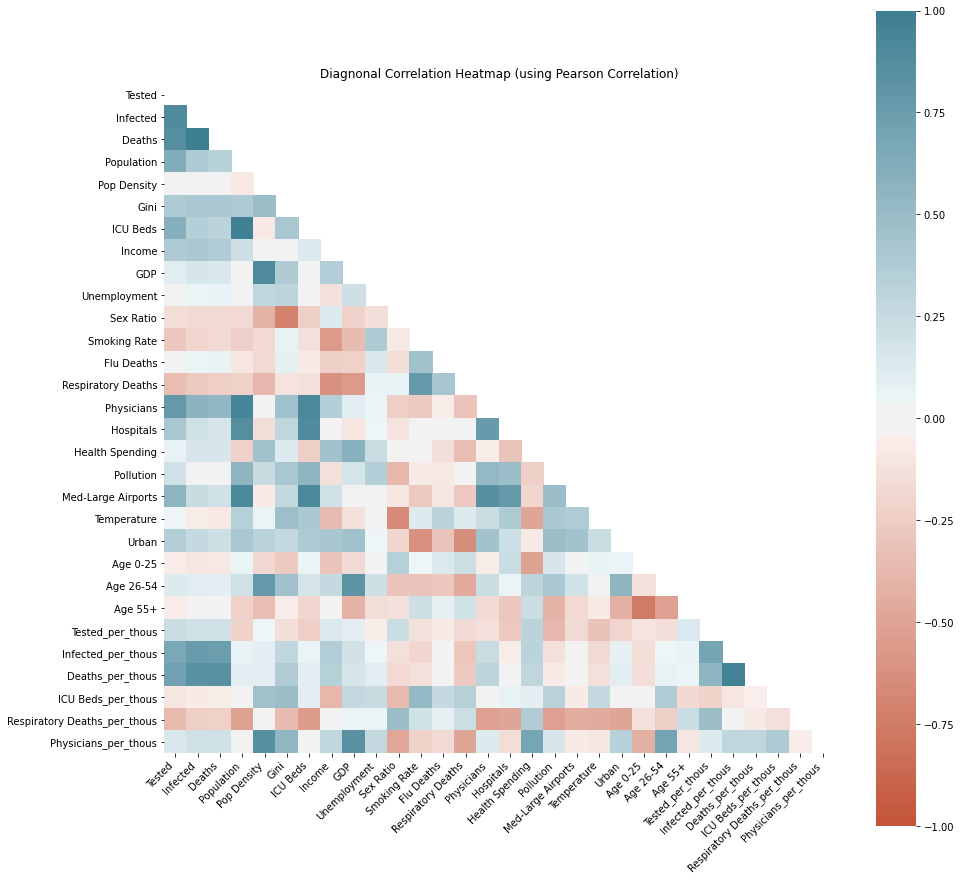

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
fig, ax = plt.subplots(figsize=(15,15))
corr = df1.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

ax = sns.heatmap(
    corr, 
    mask = mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title ("Diagnonal Correlation Heatmap (using Pearson Correlation)");

(0.3129457150316881, 0.02535404075948896)


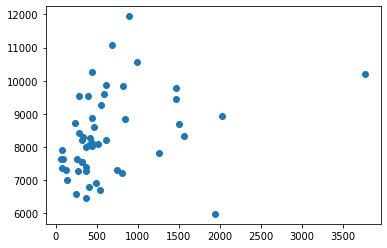

In [ ]:
x = df1['Tested_per_thous']
y = df1['Health Spending']

print(pearsonr(x, y )) # assumes linear relationship

# plot
plt.scatter(x, y)
plt.show()

#Positive correlation between health spending and  testing
#becuase pvalue is <.05 this correlation is statistically significant 

data1: mean=84.495 stdv=111.784
data2: mean=8332.157 stdv=1244.369
(0.319189374083178, 0.022428161013691512)


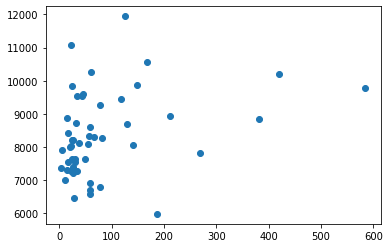

In [ ]:
x = df1['Infected_per_thous']
y = df1['Health Spending']

print('data1: mean=%.3f stdv=%.3f' % (mean(x), std(x)))
print('data2: mean=%.3f stdv=%.3f' % (mean(y), std(y)))

print(pearsonr(x, y )) # assumes linear relationship

# plot
plt.scatter(x, y)
plt.show()

#We can conclude that this statistically significant 
#positive relationship

data1: mean=655.224 stdv=638.914
data2: mean=1.775 stdv=1.919
SpearmanrResult(correlation=0.28796380090497736, pvalue=0.04045046260571772)
Pearson Coefficient
(0.4857647261190999, 0.0003021158676463182)


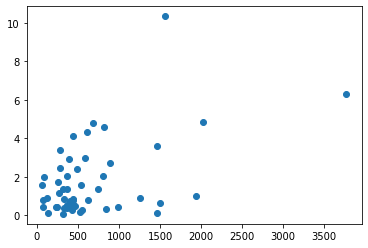

In [ ]:
#Tested and Respiratory deaths
x = df1['Tested_per_thous']
y = df1[ 'Respiratory Deaths_per_thous']

print('data1: mean=%.3f stdv=%.3f' % (mean(x), std(x)))
print('data2: mean=%.3f stdv=%.3f' % (mean(y), std(y)))

print('Pearson Coefficient')
print(pearsonr(x, y )) # assumes linear relationship

# plot
plt.scatter(x, y)
plt.show()

#We can conclude that this statistically significant 
#positive 

#Lag Plots and Autocorrelations

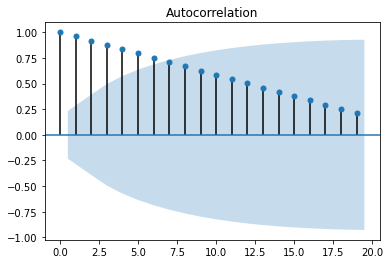

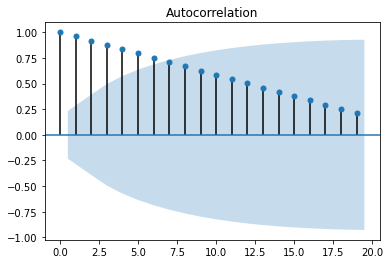

In [ ]:
#how correlated points are with each other, based on how many time steps they are separated by
#how correlated past data points are to future data points, for different values of the time separation.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ca_data["positive"])

#On the graph, there is a vertical line (a “spike”) corresponding to each lag. 
#The height of each spike shows the value of the autocorrelation function for the lag.

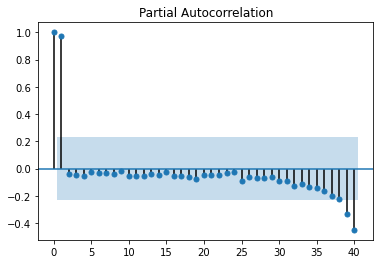

In [ ]:
plot_pacf(ca_data["positive"], lags=40)
plt.show()

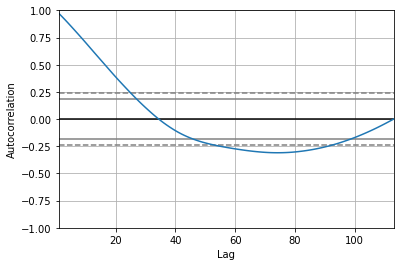

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(us_df["positive"]);
#There is autocorrelation and this statistically significant

Differencing

In [ ]:
def difference(inp):
  "Used to make the data stationary."
  diff = list()
  for i in range(1, len(inp)):
    value = inp[i] - inp[i - 1]
    diff.append(value)
  return diff

Data is now stationary!


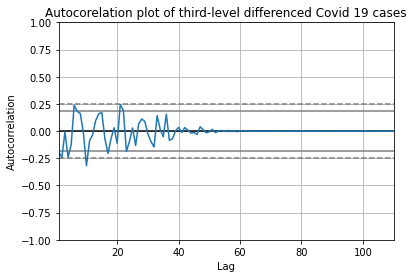

In [ ]:
raw_cases = us_df["positive"]
third_level_diff = difference(difference(difference(raw_cases)))
autocorrelation_plot(third_level_diff)
plt.title("Autocorelation plot of third-level differencing on Covid 19 cases");
print("Data is now stationary!")